---
<h1 align='center'><strong>3️⃣Named-Entity Recognition</strong></h1>

---


In [1]:
!git clone https://github.com/mohd-faizy/Natural_Language_Processing_in_Python.git

Cloning into 'Natural_Language_Processing_in_Python'...
remote: Enumerating objects: 152, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 152 (delta 16), reused 27 (delta 8), pack-reused 116
Receiving objects: 100% (152/152), 32.91 MiB | 28.25 MiB/s, done.
Resolving deltas: 100% (49/49), done.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# plt.style.use('fivethirtyeight')
# plt.style.use('ggplot')
# sns.set_theme()

%matplotlib inline

In [3]:
from pprint import pprint

In [4]:
import nltk

# Download a specific NLTK dataset, e.g., the 'punkt' tokenizer models.
nltk.download('punkt', quiet=True)

# Download the NLTK stopwords dataset, which contains common stopwords for various languages.
nltk.download('stopwords', quiet=True)

# Download the WordNet lexical database, which is used for various NLP tasks like synonym and antonym lookup.
nltk.download('wordnet', quiet=True)

# Download the NLTK averaged perceptron tagger, which is used for part-of-speech tagging.
nltk.download('averaged_perceptron_tagger', quiet=True)

# Download the NLTK names dataset, which contains a list of common first names and last names.
# nltk.download('names', quit=True)

# Download the NLTK movie_reviews dataset, which contains movie reviews categorized as positive and negative.
# nltk.download('movie_reviews', quit=True)

# Download the NLTK reuters dataset, which is a collection of news documents categorized into topics.
# nltk.download('reuters', quit=True)

# Download the NLTK brown corpus, which is a collection of text from various genres of written American English.
# nltk.download('brown', quit=True)

# Download the 'maxent_ne_chunker' dataset, which is used for Named Entity Recognition.
nltk.download('maxent_ne_chunker', quiet=True)

# Download the 'words' dataset, which contains a list of common English words.
nltk.download('words', quiet=True)

True

> **Note:** Before using `NER` via `NLTK`, we must install '`averaged_perceptron_tagger`', '`maxent_ne_chunker`', '`words`' packages.👆

In [5]:
os.chdir('/content/Natural_Language_Processing_in_Python/01-NLP-basics/_datasets')
cwd = os.getcwd()
print('Curent working directory is ', cwd)

Curent working directory is  /content/Natural_Language_Processing_in_Python/01-NLP-basics/_datasets


In [6]:
ls

 articles.csv            grail.txt            wikipedia_articles/
 english_stopwords.txt   news_articles/      'Wikipedia articles.zip'
 fake_or_real_news.csv  'News articles.zip'


## 📌**`POS-tags`**

```python
tag_mapping = {
    'CC': 'Coordinating Conjunction',
    'CD': 'Cardinal Number',
    'DT': 'Determiner',
    'EX': 'Existential There',
    'FW': 'Foreign Word',
    'IN': 'Preposition or Subordinating Conjunction',
    'JJ': 'Adjective',
    'JJR': 'Adjective, Comparative',
    'JJS': 'Adjective, Superlative',
    'LS': 'List Item Marker',
    'MD': 'Modal',
    'NN': 'Noun, Singular or Mass',
    'NNS': 'Noun, Plural',
    'NNP': 'Proper Noun, Singular',
    'NNPS': 'Proper Noun, Plural',
    'PDT': 'Predeterminer',
    'POS': 'Possessive Ending',
    'PRP': 'Personal Pronoun',
    'PRP$': 'Possessive Pronoun',
    'RB': 'Adverb',
    'RBR': 'Adverb, Comparative',
    'RBS': 'Adverb, Superlative',
    'RP': 'Particle',
    'SYM': 'Symbol',
    'TO': 'to',
    'UH': 'Interjection',
    'VB': 'Verb, Base Form',
    'VBD': 'Verb, Past Tense',
    'VBG': 'Verb, Gerund or Present Participle',
    'VBN': 'Verb, Past Participle',
    'VBP': 'Verb, Non-3rd Person Singular Present',
    'VBZ': 'Verb, 3rd Person Singular Present',
    'WDT': 'Wh-Determiner',
    'WP': 'Wh-Pronoun',
    'WP$': 'Possessive Wh-Pronoun',
    'WRB': 'Wh-Adverb'
}
```

## 📌**NER Labels**

- `PERSON`: Represents names of people or individuals, such as "John Smith."

- `ORGANIZATION`: Denotes names of organizations, companies, or institutions, such as "Microsoft."

- `LOCATION` or `GPE` (Geopolitical Entity): Identifies geographical locations, including countries, cities, states, and regions, such as "New York City" or "France."

- `DATE`: Refers to dates, including specific dates like "January 1, 2020," as well as date ranges.

- `TIME`: Represents specific times or time ranges, such as "2:00 PM" or "morning."

- `MONEY`: Denotes currency amounts and monetary values, such as "$100" or "€500."

- `PERCENT`: Identifies percentages, such as "20%."

- `ORDINAL`: Represents ordinal numbers, such as "1st" or "second."

- `CARDINAL`: Refers to cardinal numbers, including both integers and numerical values, such as "three" or "3."

- `MEASURE`: Represents measurements, units of measurement, or quantities, such as "5 kilograms" or "10 meters."

- `PRODUCT`: Denotes names of products or items, such as "iPhone" or "Toyota Camry."

- `EVENT`: Represents event names, conferences, or occurrences, such as "World Cup" or "Election Day."

- `WORK_OF_ART`: Identifies titles of books, movies, songs, or other creative works, such as "Mona Lisa" or "Hamlet."

- `LANGUAGE`: Represents names of languages, such as "English" or "Spanish."

- `LAW`: Denotes names of laws, regulations, or legal documents, such as "The Constitution" or "Copyright Act."

- `NORP` (Nationalities or Religious or Political Groups): Identifies nationalities, religious groups, or political affiliations, such as "American" or "Christian."

- `FACILITY`: Represents names of facilities or buildings, such as "Eiffel Tower" or "Harvard University."

- `MISC` (Miscellaneous): A catch-all category for named entities that don't fit into the other predefined categories.



In [7]:
# Import the necessary NLTK libraries
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from nltk.chunk import ne_chunk

# Download necessary NLTK data
nltk.download('punkt', quiet=True)
nltk.download('words', quiet=True)
nltk.download('averaged_perceptron_tagger', quiet=True)
nltk.download('maxent_ne_chunker', quiet=True)

# Sample text for Named Entity Recognition (NER)
# text = "John and Mary went to the store. It's located in New York City."
# text = "The Eiffel Tower is a famous landmark in Paris, France. It was built in 1887."
text = "In year 1969, Neil Armstrong and Buzz Aldrin became the first humans to walk on the moon."

# Tokenize the text
words_tokens = word_tokenize(text)

# Perform Part-of-Speech tagging
pos_tags = pos_tag(words_tokens)

# Initialize the Named Entity Recognition (NER) chunker
chunker = ne_chunk(pos_tags)

# Debug: Print the chunked tree structure
print(chunker)

(S
  In/IN
  year/NN
  1969/CD
  ,/,
  (PERSON Neil/NNP Armstrong/NNP)
  and/CC
  (PERSON Buzz/NNP Aldrin/NNP)
  became/VBD
  the/DT
  first/JJ
  humans/NNS
  to/TO
  walk/VB
  on/IN
  the/DT
  moon/NN
  ./.)


## **Named Entity Recognition**

**NER** stands for **Named Entity Recognition** in Natural Language Processing (NLP). It's a technique that involves `identifying` and `classifying` entities or specific pieces of information in text, such as `names` of people, `organizations`, `locations`, `dates`, and more.
>NER helps machines understand the context and extract valuable information from unstructured text, which is crucial for various NLP applications like **information retrieval**, **chatbots**, and **text analysis**.

## Examples of NER

Here are some examples of named entities:

- **Person names**: `Barack Obama`, `Albert Einstein`, `Taylor Swift`
- **Organizations**: `Google`, `Microsoft`, `United Nations`
- **Locations**: `New York City`, `Paris`, `France`, `Mount Everest`
- **Time expressions**: `August 4`, `2023`, `10:30 AM`
- **Quantities**: `10 apple`, `500 dollars`, `10% discount`

**NER** is a fundamental task in many NLP applications, such as:

- **Information retrieval**
- **Question answering**
- **Machine translation**
- **Text summarization.**

>It can also be used to extract valuable insights from large volumes of unstructured data, such as social media posts, news articles, and financial reports.


In [8]:
# Import the necessary NLTK libraries
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from nltk.chunk import ne_chunk

# Define a sentence
sentence = "In New York, I like to ride the Metro to visit MOMA and some restaurants rated well by Ruth Reichl."

# For NER
# first preprocess the text via Tokenization
tokenized_sent = word_tokenize(sentence)
print("Tokenized Sentence: ",tokenized_sent[:3])

# Second we tag the tokenized sentence for Part-of-Speech tagging
# this will add tag for proper Noun, Pronouns, Adj, verbs etc.
tagged_sent = pos_tag(tokenized_sent)
print("Tagged Sentence: ",tagged_sent[:3])

# Now passing the sentences into the name entity chunk function
# This will return the function as tree
print(ne_chunk(tagged_sent))

Tokenized Sentence:  ['In', 'New', 'York']
Tagged Sentence:  [('In', 'IN'), ('New', 'NNP'), ('York', 'NNP')]
(S
  In/IN
  (GPE New/NNP York/NNP)
  ,/,
  I/PRP
  like/VBP
  to/TO
  ride/VB
  the/DT
  (ORGANIZATION Metro/NNP)
  to/TO
  visit/VB
  (ORGANIZATION MOMA/NNP)
  and/CC
  some/DT
  restaurants/NNS
  rated/VBN
  well/RB
  by/IN
  (PERSON Ruth/NNP Reichl/NNP)
  ./.)


### NER with NLTK
You're now going to have some fun with named-entity recognition! A scraped news article has been pre-loaded into your workspace. Your task is to use `nltk` to find the named entities in this article.

What might the article be about, given the names you found?

In [9]:
# Import the necessary NLTK libraries
import nltk
from nltk import ne_chunk_sents
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.tag import pos_tag

url_uber = "/content/Natural_Language_Processing_in_Python/01-NLP-basics/_datasets/news_articles/uber_apple.txt"

with open(url_uber, 'r') as file:
    article = file.read()

# Tokenize the article into sentences: sentences
sentences = sent_tokenize(article)

# Tokenize each sentence into words: token_sentences
token_sentences = [word_tokenize(sent) for sent in sentences]

# Tag each tokenized sentence into parts of speech: pos_sentences
pos_sentences = [nltk.pos_tag(sent) for sent in token_sentences]

# Create the named entity chunks: chunked_sentences
chunked_sentences = ne_chunk_sents(pos_sentences, binary=True)

# Test for stems of the tree with 'NE' tags
# Loop over each sentence and each chunk, and test whether it is a named-entity
# chunk by testing if it has the attribute label, and if the chunk.label() is
# equal to "NE". If so, print that chunk.

for sent in chunked_sentences:
    for chunk in sent:
        if hasattr(chunk, "label") and chunk.label() == 'NE': # hasattr used to check if an object has a specific attribute
            print(chunk)

(NE Uber/NNP)
(NE Beyond/NN)
(NE Apple/NNP)
(NE Uber/NNP)
(NE Uber/NNP)
(NE Travis/NNP Kalanick/NNP)
(NE Tim/NNP Cook/NNP)
(NE Apple/NNP)
(NE Silicon/NNP Valley/NNP)
(NE CEO/NNP)
(NE Yahoo/NNP)
(NE Marissa/NNP Mayer/NNP)


> `hasattr` **used to check if an object has a specific attribute.**

In [10]:
class Person:
    def __init__(self, name, age):
        self.name = name
        self.age = age

    def __str__(self):
        return f"Person(name='{self.name}', age={self.age})"

# Create an instance of the Person class
person = Person("Alice", 30)
print(person)

# Check if the 'name' attribute exists in the 'person' object
if hasattr(person, 'name'):
    print(f"{person.name} exists in the 'person' object.")
else:
    print("The 'name' attribute does not exist in the 'person' object.")

# Check if the 'email' attribute exists in the 'person' object
if hasattr(person, 'email'):
    print("The 'email' attribute exists in the 'person' object.")
else:
    print("The 'email' attribute does not exist in the 'person' object.")

Person(name='Alice', age=30)
Alice exists in the 'person' object.
The 'email' attribute does not exist in the 'person' object.


### **Charting**

GPE
defaultdict(<class 'int'>, {'GPE': 1})
PERSON
defaultdict(<class 'int'>, {'GPE': 1, 'PERSON': 1})
PERSON
defaultdict(<class 'int'>, {'GPE': 1, 'PERSON': 2})
PERSON
defaultdict(<class 'int'>, {'GPE': 1, 'PERSON': 3})
PERSON
defaultdict(<class 'int'>, {'GPE': 1, 'PERSON': 4})
PERSON
defaultdict(<class 'int'>, {'GPE': 1, 'PERSON': 5})
PERSON
defaultdict(<class 'int'>, {'GPE': 1, 'PERSON': 6})
ORGANIZATION
defaultdict(<class 'int'>, {'GPE': 1, 'PERSON': 6, 'ORGANIZATION': 1})
GPE
defaultdict(<class 'int'>, {'GPE': 2, 'PERSON': 6, 'ORGANIZATION': 1})
PERSON
defaultdict(<class 'int'>, {'GPE': 2, 'PERSON': 7, 'ORGANIZATION': 1})


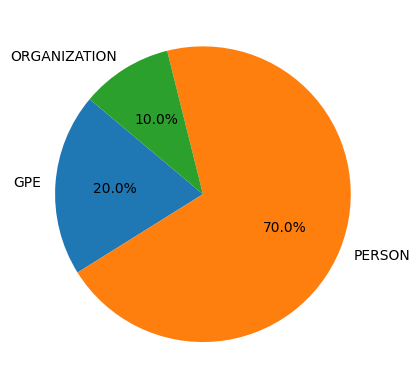

In [11]:
# Import necessary libraries
from collections import defaultdict
import nltk
from nltk.chunk import ne_chunk_sents
from nltk.tokenize import sent_tokenize, word_tokenize
import matplotlib.pyplot as plt

url_uber = "/content/Natural_Language_Processing_in_Python/01-NLP-basics/_datasets/news_articles/uber_apple.txt"

with open(url_uber, 'r') as file:
    article = file.read()

# Tokenize the article into sentences: sentences
sentences = sent_tokenize(article)
token_sentences = [word_tokenize(sent) for sent in sentences]
pos_sentences = [nltk.pos_tag(sent) for sent in token_sentences]
chunked_sentences = ne_chunk_sents(pos_sentences, binary=False)

# Create the defaultdict: ner_categories
# A specialized dictionary that allows us to set a default value for any key
ner_categories = defaultdict(int)

# Create the nested for loop
for sent in chunked_sentences:
    for chunk in sent:
        if hasattr(chunk, 'label'): # if the current `chunk` has a label attribute
            print(chunk.label())
            ner_categories[chunk.label()] += 1
            print(ner_categories)

# Create a list from the dictionary keys for the chart labels: labels
labels = list(ner_categories.keys())

# Create a list of the values: values
values = [ner_categories.get(v) for v in labels]  # Corrected to ner_categories.get(v)

# Create the pie chart
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)

# Display the chart
plt.show()

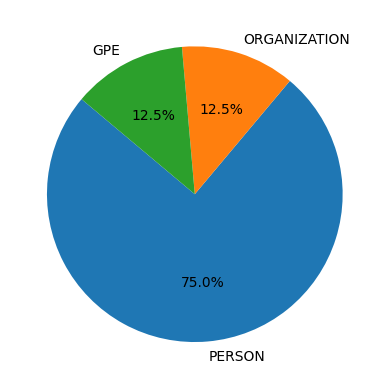

In [12]:
import nltk
from nltk import ne_chunk, pos_tag, word_tokenize
import matplotlib.pyplot as plt

# Read the text from a file
with open("/content/Natural_Language_Processing_in_Python/01-NLP-basics/_datasets/news_articles/uber_apple.txt", 'r') as file:
    article = file.read()

# NER >>>
words = word_tokenize(article)
pos_tags = pos_tag(words)
chunked = ne_chunk(pos_tags)

# Initialize a dictionary to store named entity categories and their counts
ner_categories = {}

# Iterate through the chunked data and count named entity categories
for chunk in chunked:
    if isinstance(chunk, nltk.Tree):
        label = chunk.label()
        ner_categories[label] = ner_categories.get(label, 0) + 1

# Create the pie chart
labels = list(ner_categories.keys())
values = list(ner_categories.values())

plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)
plt.show()

`.label()` is a method used to retrieve the **label** associated with an object, typically used with objects generated by libraries or frameworks like **NLTK (Natural Language Toolkit)** when working with natural language processing tasks like named entity recognition (NER).

`print(sent)`
```
(S
  ﻿The/JJ
  taxi-hailing/JJ
  company/NN
  Uber/NNP
  brings/VBZ
  ...

```

`print(chunk)`

```
('\ufeffThe', 'JJ')
('taxi-hailing', 'JJ')
('company', 'NN')
```


## **Introduction to SpaCy**

```bash
!pip install spacy
!python -m spacy download en_core_web_sm
```

> SpaCy is a popular open-source natural language processing (NLP) library known for its remarkable `speed`, `efficiency`, and `production-ready` capabilities. It equips developers and data scientists with a suite of tools to tackle a wide range of NLP tasks. Moreover, it offers pre-trained models that expedite the processing and analysis of textual data.

$\rightarrow$ `Tokenization`

$\rightarrow$ `Part-of-Speech Tagging (POS)`

$\rightarrow$ `Named Entity Recognition (NER)`

$\rightarrow$ `Dependency Parsing`

$\rightarrow$ `Lemmatization`

$\rightarrow$ `Stop Word Removal`

$\rightarrow$ `Word Vectors`

$\rightarrow$ `Text Classification`

$\rightarrow$ `Text Similarity`

$\rightarrow$ `Customization`

$\rightarrow$ `Efficiency`

$\rightarrow$ `Support for Multiple Languages`

$\rightarrow$ `Integration with Machine Leaming Pipelines`

$\rightarrow$ `Community and Documentation`

$\rightarrow$ `Named Entity Linking`

- **SpaCy**
    - SpaCy is an NLP library comparable to `NLTK` and `gensim`, but it boasts  different implementations.

    - Its primary focus is on creating `NLP pipelines` to generate models and corpora efficiently.

    - SpaCy is fully `open source`, offering additional libraries and tools to enhance its functionality. One such tool is `Displacy`.

- **Why use SpaCy for NER?**
    - `Easy pipeline creation`: SpaCy simplifies the creation of NLP pipelines, streamlining the development process.

    - It provides a **broader range of entity types** compared to nltk, making it more `versatile` for `NER` tasks.

    - SpaCy performs exceptionally well with informal language corpora, making it ideal for identifying entities in tweets, chat messages, and similar content.

### **Tokenization**

In [13]:
import spacy

# Load the SpaCy English language model
nlp = spacy.load("en_core_web_sm")

# Process a text
text = "SpaCy is a powerful NLP library."
doc = nlp(text)

# Print the tokens
for token in doc:
    print(token.text)

SpaCy
is
a
powerful
NLP
library
.


### **Part-of-Speech Tagging (POS)**

In [14]:
import spacy

nlp = spacy.load("en_core_web_sm")
text = "spaCy is an awsome NLP library"
doc = nlp(text)

for token in doc:
    print(token.text, token.pos_)

spaCy INTJ
is AUX
an DET
awsome ADJ
NLP NOUN
library NOUN


### **Named Entity Recognition (NER)**

In [15]:
import spacy

nlp = spacy.load("en_core_web_sm")

text = "Apple Inc. was founded by Steve Jobs in Cupertino, California."

doc = nlp(text)

# Print entities and their labels
for token in doc.ents:
    print(token.text, token.label_)


Apple Inc. ORG
Steve Jobs PERSON
Cupertino GPE
California GPE


### **Dependency Parsing**

In [16]:
import spacy

nlp = spacy.load("en_core_web_sm")

text = "SpaCy is a powerful NLP library."
doc = nlp(text)

# Print token text and their dependency relationships
for token in doc:
    print(token.text, token.dep_, token.head.text)

SpaCy nsubj is
is ROOT is
a det library
powerful amod library
NLP compound library
library attr is
. punct is


###  **Lemmatization**

In [17]:
import spacy

nlp = spacy.load("en_core_web_sm")

text = "Sheep are grazing in the field."
doc = nlp(text)

# Print token text and their lemmas
for token in doc:
    print(token.text, token.lemma_)


Sheep Sheep
are be
grazing graze
in in
the the
field field
. .


### **Stop Word Removal**

In [18]:
import spacy

nlp = spacy.load("en_core_web_sm")

text = "The quick brown fox jumps over the lazy dog."
doc = nlp(text)

# Print non-stop words
for token in doc:
    if not token.is_stop:
        print(token.text)

quick
brown
fox
jumps
lazy
dog
.


### **Named Entity Linking**

In [19]:
import spacy

nlp = spacy.load("en_core_web_sm")

text = "Barack Obama was born in Hawaii."

doc = nlp(text)

# Print linked entities
for ent in doc.ents:
    print(ent.text, ent.label_, ent.kb_id_)

Barack Obama PERSON 
Hawaii GPE 


In [20]:
import spacy

# Load the SpaCy English language model
nlp = spacy.load("en_core_web_sm")

# Process a text
text = "SpaCy is a powerful NLP library."
doc = nlp(text)

# Create a list to store token attributes
token_attributes = []

# Iterate through tokens and collect attributes
for token in doc:
    attributes = {
        "Token text": token.text,
        "POS tag": token.pos_,
        "Lemma": token.lemma_,
        "Is stop word": token.is_stop,
        "Is punctuation": token.is_punct,
        "Syntactic dependency": token.dep_,
        "Named entity type": token.ent_type_
    }
    token_attributes.append(attributes)

# Print token attributes in a systematic way
for index, attributes in enumerate(token_attributes, start=1):
    print(f"Token {index}:")
    for key, value in attributes.items():
        print(f"{key}: {value}")
    print()

Token 1:
Token text: SpaCy
POS tag: PROPN
Lemma: SpaCy
Is stop word: False
Is punctuation: False
Syntactic dependency: nsubj
Named entity type: 

Token 2:
Token text: is
POS tag: AUX
Lemma: be
Is stop word: True
Is punctuation: False
Syntactic dependency: ROOT
Named entity type: 

Token 3:
Token text: a
POS tag: DET
Lemma: a
Is stop word: True
Is punctuation: False
Syntactic dependency: det
Named entity type: 

Token 4:
Token text: powerful
POS tag: ADJ
Lemma: powerful
Is stop word: False
Is punctuation: False
Syntactic dependency: amod
Named entity type: 

Token 5:
Token text: NLP
POS tag: PROPN
Lemma: NLP
Is stop word: False
Is punctuation: False
Syntactic dependency: compound
Named entity type: ORG

Token 6:
Token text: library
POS tag: NOUN
Lemma: library
Is stop word: False
Is punctuation: False
Syntactic dependency: attr
Named entity type: 

Token 7:
Token text: .
POS tag: PUNCT
Lemma: .
Is stop word: False
Is punctuation: True
Syntactic dependency: punct
Named entity type: 



### Comparing `NLTK` with `spaCy` `NER`


Both `NLTK` and `spaCy` are popular Python libraries for Natural Language Processing (NLP) with capabilities for **Named Entity Recognition** (NER).

>**NLTK** is more academic, highly customizable, and flexible, but slower. It’s popular among researchers and supports a wide range of languages.

>On the other hand, **spaCy** is more like a service, providing fast and accurate syntactic analysis. It’s user-friendly, optimized for speed, and comes with pre-trained models for common NLP tasks.

However, it supports fewer languages than **NLTK**. For **NER**, spaCy is simpler to use and more efficient, while **NLTK** requires additional steps for tokenization and stopword removal.



In [21]:
import nltk
import spacy

# Initialize NLTK's NER
nltk.download('maxent_ne_chunker', quiet=True)
nltk.download('words', quiet=True)
from nltk import word_tokenize, pos_tag, ne_chunk

# Initialize spaCy's NER
nlp = spacy.load('en_core_web_sm')

# Sample text
text = "Apple Inc. is a technology company based in Cupertino, California."

# NLTK NER
def nltk_ner(text):
    tokens = word_tokenize(text)
    tagged = pos_tag(tokens)
    ner_result = ne_chunk(tagged)
    return ner_result

# spaCy NER
def spacy_ner(text):
    doc = nlp(text)
    ner_result = [(ent.text, ent.label_) for ent in doc.ents]
    return ner_result

# Compare NLTK and spaCy NER results
nltk_result = nltk_ner(text)
spacy_result = spacy_ner(text)

print("NLTK NER Result:")
print(nltk_result)
print("-"*100)
print("\nspaCy NER Result:")
print(spacy_result)

NLTK NER Result:
(S
  (PERSON Apple/NNP)
  (ORGANIZATION Inc./NNP)
  is/VBZ
  a/DT
  technology/NN
  company/NN
  based/VBN
  in/IN
  (GPE Cupertino/NNP)
  ,/,
  (GPE California/NNP)
  ./.)
----------------------------------------------------------------------------------------------------

spaCy NER Result:
[('Apple Inc.', 'ORG'), ('Cupertino', 'GPE'), ('California', 'GPE')]


### **Which are the extra categories that spacy uses compared to nltk in its named-entity recognition?**

spaCy's NER system recognizes the following categories of named entities by default:

- `PERSON`: People, including fictional.
- `NORP`: Nationalities or religious or political groups.
- `FAC`: Buildings, airports, highways, bridges, etc.
- `ORG`: Companies, agencies, institutions, etc.
- `GPE`: Countries, cities, states, and other geographical entities.
- `LOC`: Non-GPE locations, such as streets, mountains, and bodies of water.
- `PRODUCT`: Products and services.
- `EVENT`: Events, such as conferences, concerts, and sporting events.
- `WORK_OF_ART`: Creative works, such as books, movies, and songs.
- `LANGUAGE`: Languages.
- `DATE`: Dates and times.
- `MONEY`: Monetary amounts.
- `QUANTITY`: Quantities, such as distances, weights, and volumes.

NLTK's NER system recognizes the following categories of named entities by default:

- `PERSON`: People, including fictional.
- `LOCATION`: Geographical locations, such as countries, cities, and states.
- `ORGANIZATION`: Organizations, such as companies, schools, and governments.
- `DATE`: Dates and times.
- `MONEY`: Monetary amounts.
- `PERCENT`: Percentages.

As you can see, spaCy's NER system recognizes a number of additional categories of named entities, including:

- `NORP`: Nationalities or religious or political groups.
- `FAC`: Buildings, airports, highways, bridges, etc.
- `PRODUCT`: Products and services.
- `EVENT`: Events, such as conferences, concerts, and sporting events.
- `WORK_OF_ART`: Creative works, such as books, movies, and songs.
- `LANGUAGE`: Languages.
- `QUANTITY`: Quantities, such as distances, weights, and volumes.

These additional categories of named entities can be useful for a variety of NLP tasks, such as question answering, information extraction, and text summarization.

## **Multilingual NER with polyglot**

- **Polyglot**
    - NLP library which uses **word vectors** is** Open-source** NLP library for multilingual text processing.
    - vectors for many different languages (more than `130`)
    - Offers linguistic analysis and tools for various languages.
    - Valuable for developers and researchers in multilingual NLP.

- **Features**:

- `Named Entity Recognition` (`NER`): Identifies entities (e.g., names, locations) in multiple languages.
- `Part-of-Speech Tagging` (`POS`): Assigns word tags for grammatical analysis.
- `Language Detection`: Automatically detects the language of input text.
- `Word Embeddings`: Pre-trained word vectors for various languages.
- `Text Tokenization`: Splits text into units (words, sentences).
- `Sentiment Analysis`: Analyzes sentiment in different languages.
- `Morphological Analysis`: Examines word structure and inflections.
- `Text-to-Speech` (`TTS`): Converts text to spoken language (available in some versions).

### French NER with polyglot `I`

In this exercise we are using `polyglot` library to identify French entities. The library functions slightly differently than `spacy`.

> Note: Before using polyglot for specific language, we need to download appropriate language model. Also, it requires some dependencies.

In [22]:
! pip install pyicu -q
! pip install pycld2 -q
! pip install Morfessor -q
! pip install polyglot -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.9/257.9 kB 3.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 MB 19.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.3/126.3 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [23]:
# Import the necessary modules from Polyglot
from polyglot.downloader import downloader
from polyglot.text import Text

# Download language resources (NER and embeddings) quietly
downloader.download("ner2.fr", quiet=True)
downloader.download("embeddings2.fr", quiet=True)

# Define the URL to the French text file
url = "/content/Natural_Language_Processing_in_Python/01-NLP-basics/_datasets/news_articles/french.txt"

# Read the contents of the text file
with open(url, 'r') as file:
    article = file.read()

# Create a Polyglot Text object for analysis
txt = Text(article)

# Print each named entity found in the text
for ent in txt.entities:
    print(ent)

# Print the type of the last entity
print(type(ent))

['Charles', 'Cuvelliez']
['Charles', 'Cuvelliez']
['Bruxelles']
['l’IA']
['Julien', 'Maldonato']
['Deloitte']
['Ethiquement']
['l’IA']
['.']
<class 'polyglot.text.Chunk'>


### French NER with polyglot II

Using a list comprehension to create a list of `tuples`, in which the **first** element is the `entity` tag, and the **second** `element` is the full string of the entity text.

In [24]:
# Create the list of tuples: entities
entities = [(ent.tag, ' '.join(ent)) for ent in txt.entities]

# Print entities
pprint(entities)

[('I-PER', 'Charles Cuvelliez'),
 ('I-PER', 'Charles Cuvelliez'),
 ('I-ORG', 'Bruxelles'),
 ('I-PER', 'l’IA'),
 ('I-PER', 'Julien Maldonato'),
 ('I-ORG', 'Deloitte'),
 ('I-PER', 'Ethiquement'),
 ('I-LOC', 'l’IA'),
 ('I-PER', '.')]


### Spanish NER with polyglot
You'll continue your exploration of `polyglot` now with some Spanish annotation. This article is not written by a newspaper, so it is your first example of a more blog-like text. How do you think that might compare when finding entities?

Your specific task is to determine how many of the entities contain the words `"Márquez"` or `"Gabo"` - these refer to the same person in different ways!

In [25]:
from polyglot.downloader import downloader

downloader.download("ner2.es", quiet=True)
downloader.download("embeddings2.es", quiet=True)

url = "/content/Natural_Language_Processing_in_Python/01-NLP-basics/_datasets/news_articles/spanish.txt"
with open(url, 'r') as file:
    article = file.read()

txt = Text(article)

# Initialize the count variable: count
count = 0

# Iterate over all the entities
for ent in txt.entities:
    # check whether the entity contains 'Márquez' or 'Gabo'
    if ('Márquez' in ent) or ('Gabo' in ent):
        # Increment count
        count += 1

# Print count
print(count)

# Calculate the percentage of entities that refer to "Gabo": percentage
percentage = count / len(txt.entities)
print(percentage * 100)

28
29.78723404255319
